In [1]:
import keras



PACE = keras.models.load_model('/content/drive/MyDrive/CapstoneWalks/BestModelWeights/7x7PACE')
PACE_Corner = keras.models.load_model('/content/drive/MyDrive/CapstoneWalks/BestModelWeights/Corner7x7PACE')
PACE_Random =  keras.models.load_model('/content/drive/MyDrive/CapstoneWalks/BestModelWeights/Random7x7PACE')

ACE = keras.models.load_model('/content/drive/MyDrive/CapstoneWalks/BestModelWeights/150x150ACE')
ACE_Corner = keras.models.load_model('/content/drive/MyDrive/CapstoneWalks/BestModelWeights/Corner150x150ACE')
ACE_Random =  keras.models.load_model('/content/drive/MyDrive/CapstoneWalks/BestModelWeights/Random150x150ACE')


In [2]:
def RMSE(arr1,arr2):

  r = (arr1-arr2)**2

  r = r.sum()/(4*numWalks)  #Scale down the walks to calculate mean square error

  r = r**.5 #Calculate RMSE for entire model

  return r

In [3]:

import h5py
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

filename = '/content/drive/MyDrive/loadwalks.py'
exec(open(filename).read())

filename = '/content/drive/MyDrive/confidenceintervals.py'
exec(open(filename).read())


path1 = '/content/drive/MyDrive/CapstoneWalks/Corner150Dim_1250Steps_Walks_Test.h5'
path2 = '/content/drive/MyDrive/CapstoneWalks/Corner150Dim_1250Steps_Targets_Test.h5'

path3 = '/content/drive/MyDrive/CapstoneWalks/7x7Encoded150Dim_1250Steps_Walks_Test.h5'
path4 = '/content/drive/MyDrive/CapstoneWalks/150Dim_1250Steps_Targets_Test.h5'


path5 = '/content/drive/My Drive/CapstoneWalks/Corner7x7Encoded150Dim_1250Steps_Walks_Test.h5'

path6 = '/content/drive/MyDrive/CapstoneWalks/150Dim_1250Steps_Walks_Test.h5'


path7 = '/content/drive/MyDrive/CapstoneWalks/Random150Dim_1250Steps_Walks_Test.h5'
path8 = '/content/drive/MyDrive/CapstoneWalks/Random7x7Encoded150Dim_1250Steps_Walks_Test.h5'
path9 = '/content/drive/MyDrive/CapstoneWalks/Random150Dim_1250Steps_Targets_Test.h5'

Corner_Walks_Testing_ACE = read_one_hdf5(path1)
Corner_Walks_Targets_Testing = read_one_hdf5(path2)

Middle_Walks_Testing_ACE = read_one_hdf5(path6)
Middle_Walks_Targets_Testing = read_one_hdf5(path4)

Corner_Walks_Testing_PACE = read_one_hdf5(path5)
Middle_Walks_Testing_PACE = read_one_hdf5(path3)

Random_Walks_Testing_ACE = read_one_hdf5(path7)
Random_Walks_Testing_PACE = read_one_hdf5(path8)

Random_Walks_Targets_Testing = read_one_hdf5(path9)

Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed


In [11]:
steps = 1250
#Need to scale the data sets for prediction since they were scaled before training 

#only run once then comment out
#Random_Walks_Testing_ACE = Random_Walks_Testing_ACE/steps
#Middle_Walks_Testing_ACE = Middle_Walks_Testing_ACE/steps





In [15]:
numWalks = 10000


predictions = PACE.predict(Middle_Walks_Testing_PACE)
RMSE(predictions,Middle_Walks_Targets_Testing)

0.05344883848664336

In [16]:
predictions_ACE = ACE.predict(Middle_Walks_Testing_ACE)
RMSE(predictions_ACE,Middle_Walks_Targets_Testing)

0.023270956746602012

[0.30849552 0.11844058 0.26750144 0.3047273 ]
[0.25635234 0.11842026 0.28526685 0.34961745]
[0.25199604 0.10922468 0.30587924 0.33290005]


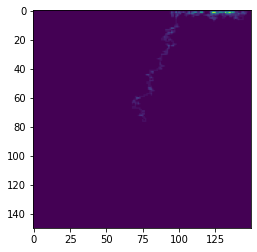

In [38]:
h = 555

PACE_Prediction = predictions[h]
print(PACE_Prediction)

ACE_Prediction = predictions_ACE[h]
print(ACE_Prediction)

print(Middle_Walks_Targets_Testing[h])

plt.imshow(Middle_Walks_Testing_PACE[h])
plt.imshow(Middle_Walks_Testing_ACE[h])

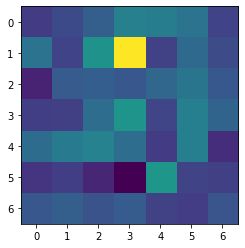

In [39]:
plt.imshow(Middle_Walks_Testing_PACE[h])


In [ ]:
Middle_Walks_Testing_ACE[1040]

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   2.],
       [  0.,   0.,   0., ...,   0.,   2.,  19.],
       [  0.,   0.,   0., ...,  29., 144., 823.]], dtype=float32)

'our mean lies in the interval ]1.0063, 1.0069['

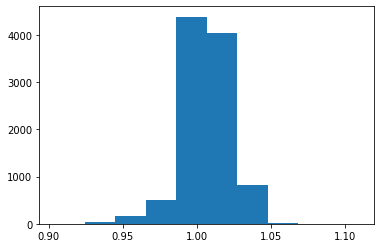

In [ ]:
predictions = PACE_Corner.predict(Corner_Walks_Testing_PACE)

sums = [sum(array) for array in predictions]
plt.hist(sums)
sum(sums)/len(sums)
report_confidence_interval(confidence_interval(sums, confidence=0.95))